# Library importation

https://www.musicindustryhowto.com/elements-of-music/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

In [2]:
df = pd.read_csv("spotify_data.csv")

In [3]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [4]:
df.shape

(169909, 19)

In [5]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [6]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

## Are there missing values ?

In [7]:
df.isna().any().any()

False

# Data Restructuration

In [8]:
# remove the release_date column because of the inconsistency of its data
# sometimes we have the whole date and other times, it's just the year
# it seems like just keeping the year column is relevant
new_df = df.drop(columns=["release_date"])

In [9]:
new_df.shape

(169909, 18)

# Correlation between columns

In [9]:
# compute the pairwise correlation coefficient between all the columns but name, artists, year, id, key
new_df2 = new_df.drop(columns=["name", "artists", "id", "key"])
new_df2.corr(numeric_only=False)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.265950,-0.079311,-0.750283,-0.253690,0.335821,-0.023871,-0.567072,0.046475,-0.593345,-0.056077,-0.204982,-0.185540,-0.624550
danceability,-0.265950,1.000000,-0.134500,0.220569,0.241891,-0.281429,-0.105532,0.294170,-0.045306,0.221077,0.225305,-0.004872,0.560242,0.203430
duration_ms,-0.079311,-0.134500,1.000000,0.036396,-0.043811,0.084814,0.034270,-0.014687,-0.046981,0.063292,-0.058449,-0.028816,-0.198760,0.076293
energy,-0.750283,0.220569,0.036396,1.000000,0.142677,-0.287692,0.126293,0.782982,-0.038355,0.497488,-0.045226,0.249936,0.350086,0.532419
explicit,-0.253690,0.241891,-0.043811,0.142677,1.000000,-0.138292,0.039272,0.152695,-0.083221,0.214044,0.413074,0.011484,-0.022327,0.245227
instrumentalness,0.335821,-0.281429,0.084814,-0.287692,-0.138292,1.000000,-0.047397,-0.417033,-0.035051,-0.299829,-0.115735,-0.107570,-0.193929,-0.291571
liveness,-0.023871,-0.105532,0.034270,0.126293,0.039272,-0.047397,1.000000,0.052985,0.005393,-0.075293,0.147667,0.008124,-0.000426,-0.055839
loudness,-0.567072,0.294170,-0.014687,0.782982,0.152695,-0.417033,0.052985,1.000000,-0.013147,0.466546,-0.105796,0.211114,0.308418,0.490118
mode,0.046475,-0.045306,-0.046981,-0.038355,-0.083221,-0.035051,0.005393,-0.013147,1.000000,-0.032854,-0.057493,0.014539,0.014727,-0.033084
popularity,-0.593345,0.221077,0.063292,0.497488,0.214044,-0.299829,-0.075293,0.466546,-0.032854,1.000000,-0.135707,0.135047,0.009327,0.880724


From this pairwise correlation, the data below have a "strong" correlation(there, we consider as 
strong correlation a correlation for which Pearson coefficient r is >= 0.5) : 
- acousticness and energy are strongly correlated with r = -0.75
- acousticness is also correlated to loudness with r = -0.56
- acousticness and popularity are correlated with r = -0.59
- danceability is correlated to valence with r = 0.56
- energy is strongly correlated to loudness with r = 0.78

From those observations, some questions pop up :
- will PCA be enough to visualize the underlying structure of those data ? In fact, 8/13 columns are pairwise correlated. And we know that PCA is based on the linear dependence of features. So, is there any linear dependence between all those data ?
- can we use acoustic to predict energy, loudness and/or popularity ?
- can we use danceability to predict valence ?
- can we use energy to predict loudness ?
- can we perform a multiple regression between energy, loudness and acousticness

See you on the next episode(which is the remainder of this project 😉) !!!

# Some visualization

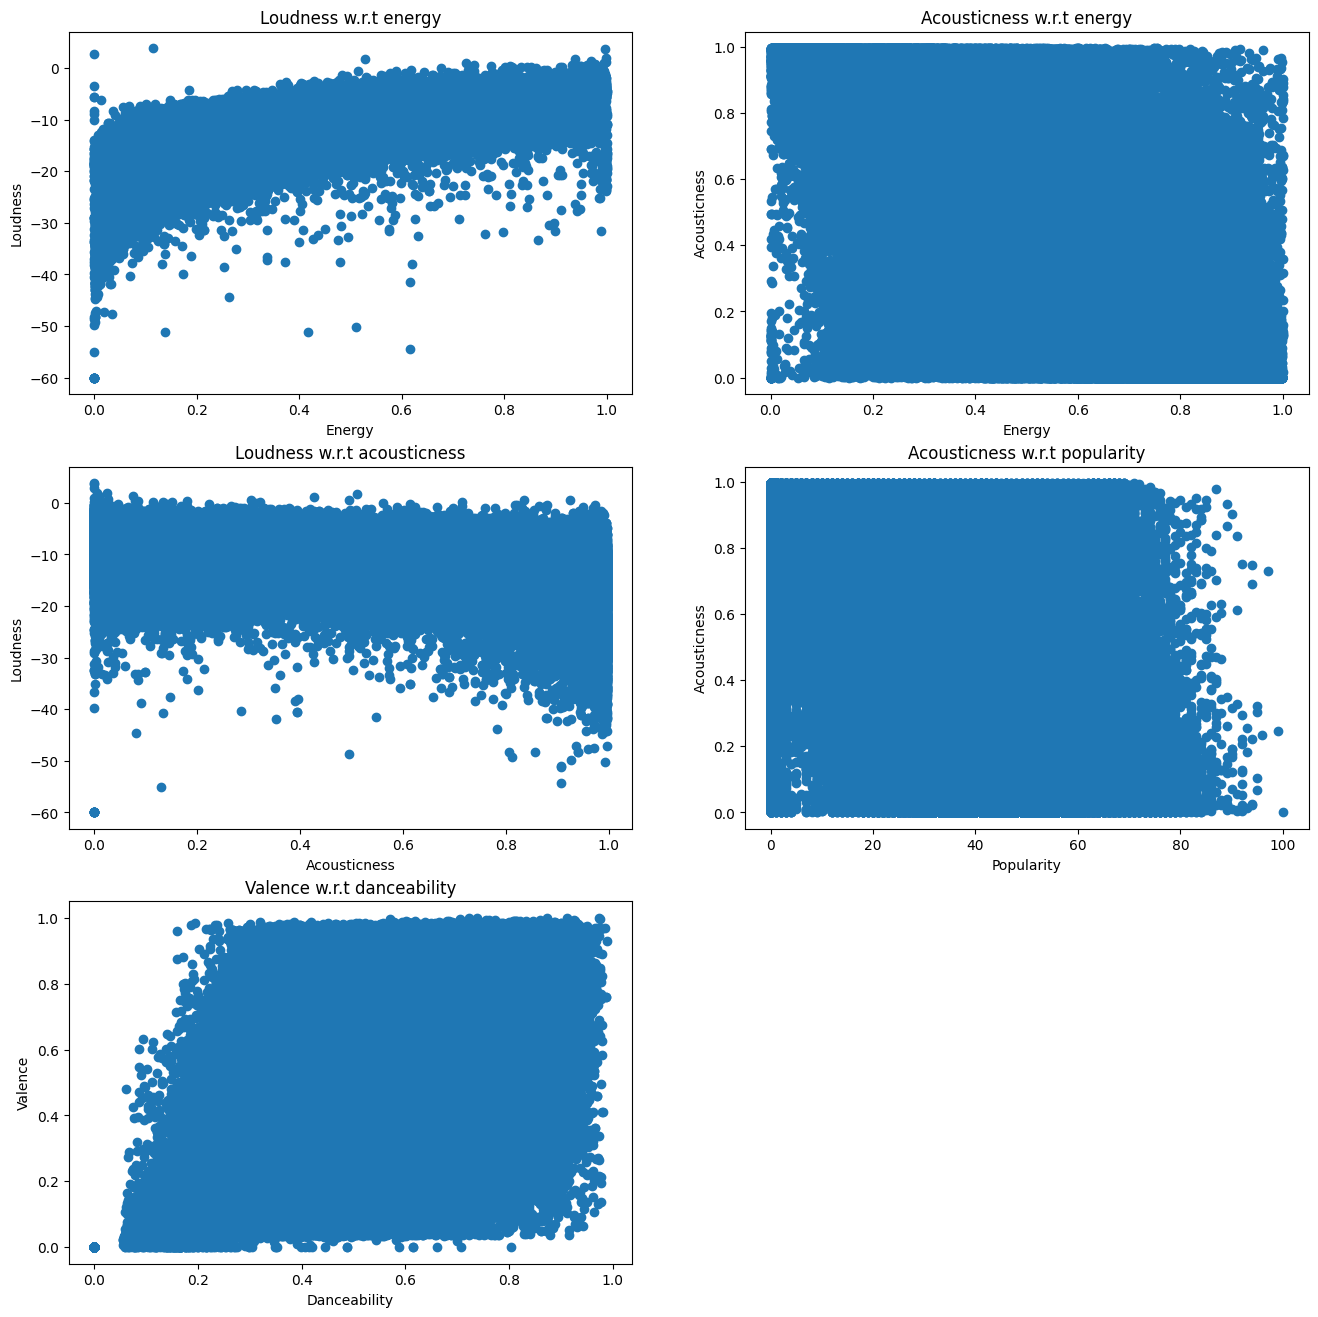

In [11]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(321)
ax.scatter(new_df["energy"], new_df["loudness"])
ax.set_xlabel("Energy")
ax.set_ylabel("Loudness")
ax.set_title("Loudness w.r.t energy")

ax2 = fig.add_subplot(322)
ax2.scatter(new_df["energy"], new_df["acousticness"])
ax2.set_xlabel("Energy")
ax2.set_ylabel("Acousticness")
ax2.set_title("Acousticness w.r.t energy")

ax3 = fig.add_subplot(323)
ax3.scatter(new_df["acousticness"], new_df["loudness"])
ax3.set_xlabel("Acousticness")
ax3.set_ylabel("Loudness")
ax3.set_title("Loudness w.r.t acousticness")

ax4 = fig.add_subplot(324)
ax4.scatter(new_df["popularity"], new_df["acousticness"])
ax4.set_xlabel("Popularity")
ax4.set_ylabel("Acousticness")
ax4.set_title("Acousticness w.r.t popularity")

ax5 = fig.add_subplot(325)
ax5.scatter(new_df["danceability"], new_df["valence"])
ax5.set_xlabel("Danceability")
ax5.set_ylabel("Valence")
ax5.set_title("Valence w.r.t danceability")
plt.show()

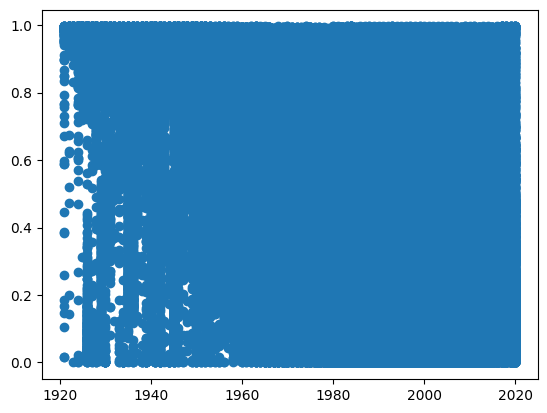

In [16]:
plt.scatter(df["year"], df["acousticness"])

# What makes you popular ?

In [100]:
pivot = pd.pivot_table(
    data = df,
    values = ["popularity"],
    index = ["year"],
    aggfunc= {"popularity" : np.max}
)

In [101]:
pivot

,popularity
year,
1921,7
1922,10
1923,44
1924,13
1925,37
...,...
2016,92
2017,87
2018,92


In [102]:
new_df = pd.merge(left=df, right=pivot, on=["year","popularity"], how="inner")

In [103]:
new_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.73200,['Dennis Day'],0.819,180533,0.3410,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,7,1921,0.4150,60.936,0.963,1921
1,0.67400,['Uli'],0.645,126903,0.4450,0,35iwgR4jXetI318WEWsa1Q,0.744000,0,0.1510,-13.338,1,Carve,10,1922-02-22,0.4510,104.851,0.127,1922
2,0.99600,['Bessie Smith'],0.614,177133,0.0423,0,2wAfHM7Whz67VFbdanhZlk,0.002930,4,0.1830,-12.033,1,Nobody Knows You When You're Down and Out,44,1923,0.0535,89.822,0.211,1923
3,0.81600,"['Paul Whiteman & His Orchestra', 'Bix Beiderb...",0.678,206000,0.3950,0,59UEylF5pnWCXm91Hzk2Q9,0.240000,3,0.1000,-9.825,1,Mississippi Mud (feat. Bix Beiderbecke),13,1924,0.1330,184.446,0.832,1924
4,0.96900,['Tommy Dorsey'],0.678,194320,0.1750,0,3XDharvL8vEyxdQwOQKmww,0.001050,3,0.1770,-13.021,1,"On the Sunny Side of the Street (From ""Is Ever...",37,1925,0.0301,112.941,0.580,1925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.00513,['Travis Scott'],0.834,312820,0.7300,1,2xLMifQCjDGFmkHkpNLD9h,0.000000,8,0.1240,-3.714,1,SICKO MODE,92,2018-08-03,0.2220,155.008,0.446,2018
112,0.10400,['Roddy Ricch'],0.896,196653,0.5860,1,0nbXyq5TXYPCO7pr3N8S4I,0.000000,10,0.7900,-6.687,0,The Box,95,2019-12-06,0.0559,116.971,0.642,2019
113,0.30500,"['BENEE', 'Gus Dapperton']",0.863,223480,0.6310,1,4nK5YrxbMGZstTLbvj6Gxw,0.000030,7,0.1230,-4.689,1,Supalonely,95,2019-11-15,0.0534,128.977,0.817,2019
114,0.06860,"['Surf Mesa', 'Emilee']",0.674,176547,0.7740,0,62aP9fBQKYKxi7PDXwcUAS,0.001880,11,0.3930,-7.567,0,ily (i love you baby) (feat. Emilee),95,2019-11-26,0.0892,112.050,0.330,2019


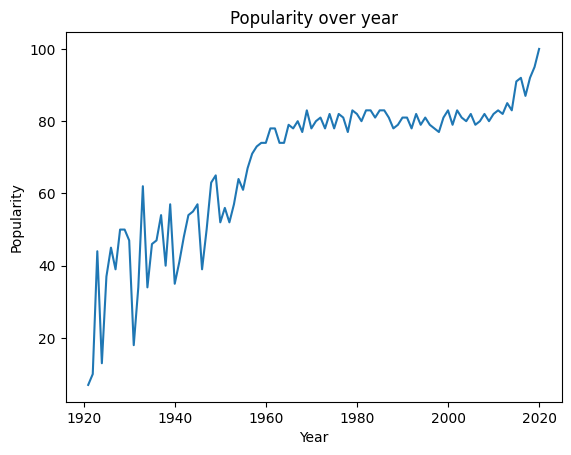

In [111]:
plt.title("Popularity over year")
plt.plot(new_df["year"], new_df["popularity"])
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.show()

In [110]:
# correlation on popularity based dataframe
temp = new_df.drop(columns=["artists", "id", "name", "release_date"])
temp.corr(numeric_only=False)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.237745,-0.233463,-0.791627,-0.285772,0.354957,-0.244792,0.027236,-0.637858,0.060491,-0.668263,-0.068079,-0.115925,-0.241590,-0.719729
danceability,-0.237745,1.000000,-0.161146,0.237156,0.306325,-0.144177,0.092587,-0.152534,0.291972,-0.269924,0.143088,0.277322,-0.116767,0.440044,0.277667
duration_ms,-0.233463,-0.161146,1.000000,0.160213,0.067502,0.192317,-0.052597,0.010463,0.076465,0.092035,0.170118,-0.151659,0.031471,-0.213265,0.174922
energy,-0.791627,0.237156,0.160213,1.000000,0.237225,-0.134810,0.211517,-0.007048,0.765425,-0.157322,0.471048,0.143477,0.161010,0.385241,0.586424
explicit,-0.285772,0.306325,0.067502,0.237225,1.000000,-0.113294,0.043322,0.067461,0.312378,-0.043679,0.294083,0.232703,0.009464,-0.021262,0.415339
instrumentalness,0.354957,-0.144177,0.192317,-0.134810,-0.113294,1.000000,-0.112658,0.047883,-0.370925,-0.083650,-0.484413,0.184226,-0.111792,-0.263161,-0.395203
key,-0.244792,0.092587,-0.052597,0.211517,0.043322,-0.112658,1.000000,0.196474,0.157409,-0.148708,0.205558,-0.092562,0.062531,0.137381,0.257039
liveness,0.027236,-0.152534,0.010463,-0.007048,0.067461,0.047883,0.196474,1.000000,0.021476,-0.054034,-0.056309,-0.107116,0.026436,-0.071559,-0.072207
loudness,-0.637858,0.291972,0.076465,0.765425,0.312378,-0.370925,0.157409,0.021476,1.000000,-0.105312,0.443783,0.076441,0.228864,0.318453,0.581250
mode,0.060491,-0.269924,0.092035,-0.157322,-0.043679,-0.083650,-0.148708,-0.054034,-0.105312,1.000000,0.032674,-0.078648,0.004055,-0.114083,-0.071082


# Data Splitting

In order to train and test our models, we decided to split our dataset into train and testing data. Testing data will represent 30% of our dataset

In [9]:
# ***************** splitting ******************
index1 = new_df.index

# get the training data : 70% of the dataset
df_train = new_df.sample(frac=0.7)
index2 = df_train.index

# get the testing data
mask = np.isin(index1, index2, invert=True)
df_test = new_df.iloc[mask]

# reset indexes 
df_train.reset_index(drop=True)
df_test.reset_index(drop=True)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
1,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928
2,0.8460,['Seweryn Goszczyński'],0.674,111600,0.2050,0,6PrZexNb16cabXR8Q418Xc,0.000000,9,0.1700,-20.119,1,Chapter 1.3 - Zamek kaniowski,0,0.9540,81.249,0.7590,1928
3,0.9900,"['Samuel Barber', 'Vladimir Horowitz']",0.359,338333,0.0435,0,6QgdUySTRGVkNo3KwbHpK3,0.899000,7,0.1090,-20.858,1,"Piano Sonata in E-Flat Minor, Op. 26: III. Ada...",0,0.0424,96.645,0.0420,1928
4,0.9770,"['Ludwig van Beethoven', 'Staatskapelle Berlin...",0.335,276563,0.1050,0,6Rwn56jcC0TdGQzbRl7NGw,0.840000,5,0.2310,-16.049,0,"Symphony No. 5 in C Minor, Op. 67: 3. Allegro",0,0.0716,80.204,0.4060,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50968,0.3040,"['Kygo', 'Patrick Droney', 'Petey']",0.593,207898,0.4300,0,5vDjcNbN4m9fxWcrpR64Wu,0.000000,0,0.0896,-8.977,1,Say You Will,69,0.0431,122.090,0.0955,2020
50969,0.0274,"['Lil Tjay', 'Sheff G', 'Sleepy Hallow']",0.701,191904,0.6450,1,0w1x05XBSRIuVmKd3D0IPd,0.000174,8,0.3270,-3.084,0,Wet Em Up Pt. 2,67,0.1640,107.955,0.5760,2020
50970,0.3710,['YoungBoy Never Broke Again'],0.623,161019,0.7210,1,73C80fhriFzangrzWVO4Zp,0.000000,10,0.1090,-4.584,0,Rough Ryder,64,0.3390,166.637,0.7190,2020
50971,0.0227,"['Trey Songz', 'Summer Walker']",0.619,194576,0.7190,1,5QZ11AHm7xiytOGXGlxQi5,0.000000,0,0.0839,-4.111,1,Back Home (feat. Summer Walker),69,0.1570,86.036,0.3510,2020


# Models

## Some importations

In [2]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import PolynomialFeatures

## Regression Models

### Linear Regression of loudness

On this part, we're going to build a regressor on the loudness given the energy

#### Training phase

In [13]:
model = LinearRegression()
energy = np.array(df_train["energy"]).reshape(-1, 1)
loudness = np.array(df_train["loudness"]).reshape(-1,1)
model.fit(energy, loudness)

LinearRegression()

Residuals = 1482664.490956728
The coefficient of determination is 0.6130485873460361


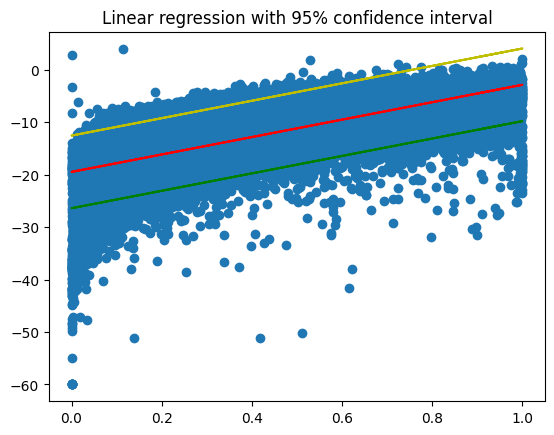

In [20]:
# Prediction on the training data
pred = model.predict(energy)

# Get the residuals
res = np.sum((pred-loudness)**2)
print(f"Residuals = {res}")

# Get the coefficient of determination
coef = model.score(energy, loudness)
print(f"The coefficient of determination is {coef}")

# Build a 95% confidence interval
std = np.sqrt((1/(len(loudness)-2))*res)
interval = (std * 1.96)
low, up = pred - interval, pred + interval

# Plot the data and the model
plt.title("Linear regression with 95% confidence interval")
plt.scatter(df_train["energy"], df_train["loudness"])
plt.plot(energy, low, c="g")
plt.plot(energy, pred, c="r")
plt.plot(energy, up, c="y")
plt.show()



In [21]:
print(model.coef_)

[[16.60516406]]


Observation :
We only have a score of 61,30% on training data. So, a simple linear regression of loudness with energy is not enough

#### Testing step

In [22]:
pred2 = model.predict(np.array(df_test["energy"]).reshape(-1,1))

score = model.score(np.array(df_test["energy"]).reshape(-1,1), np.array(df_test["loudness"]).reshape(-1,1))

print(f"Score = {score}")

Score = 0.6130859573184437


The score in testing data is a bit greater than the score in the training data. 

### Multiple linear regression of loudness with energy

#### Training phase

Score on training data : 0.6944451881403634


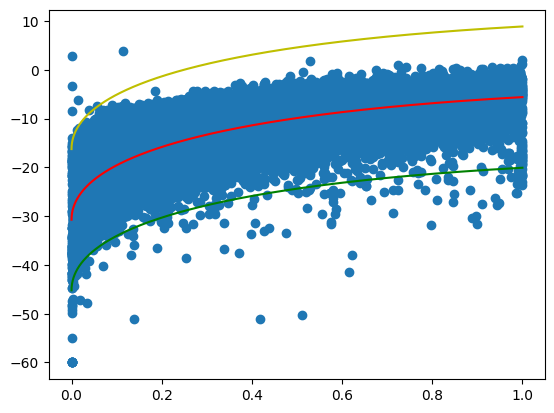

In [30]:
model_mult = LinearRegression()
energies = np.hstack((np.asarray(df_train["energy"]).reshape(-1,1), np.sqrt(np.asarray(df_train["energy"]).reshape(-1,1))))

# fit the model
model_mult.fit(energies, loudness)

# prediction training set
loudness_pred = model_mult.predict(energies)

# To get a nice plot
stack = np.hstack((energy, loudness, loudness_pred))
sorted_s = stack[np.argsort(stack[:, 0])]
energy2, loudness2, loudness_pred = np.hsplit(sorted_s, 3)

# score training data
score = model_mult.score(energies, loudness)
print(f"Score on training data : {score}")

# Compute a 95% confidence interval of the prediction
sum_errs = np.sum((loudness_pred - loudness)**2)
std = np.sqrt((1/(len(loudness)-2)) * sum_errs)
interval = 1.96 * std
low, up = loudness_pred - interval, loudness_pred + interval

# Plot 
plt.scatter(df_train["energy"], df_train["loudness"])
plt.plot(energy2, low, c="g")
plt.plot(energy2, loudness_pred, c="r")
plt.plot(energy2, up, c="y")
plt.show()

We get a better score and a better confidence interval

#### Testing

In [31]:
energies_test = np.hstack((np.asarray(df_test["energy"]).reshape(-1,1), np.sqrt(np.asarray(df_test["energy"]).reshape(-1,1))))

# prediction
loudness_predictions = model_mult.predict(energies_test)

# score
score1 = model_mult.score(energies_test, np.array(df_test["loudness"]).reshape(-1,1))

print(f"Score on test data = {score1}")

Score on test data = 0.6906821928115233


In [32]:
print(f"Difference of score between test data and training data : {score1 - score}")

Difference of score between test data and training data : -0.0037629953288400575


The score is a bit better on traing data

### Polynomial Ridge Regression on loudness given energy

#### Training step

Score = 0.6130485789009723
Ridge with degree = 1


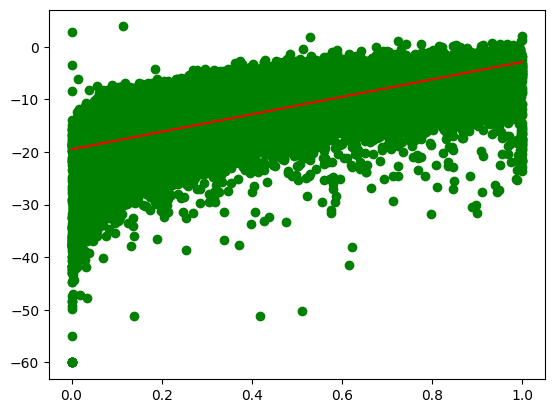

Score = 0.6684825016446907
Ridge with degree = 2


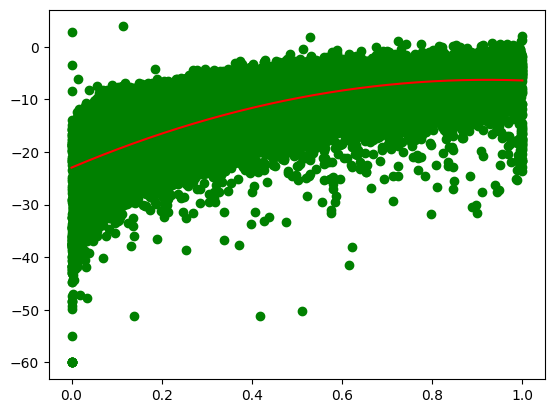

Score = 0.6856998841526967
Ridge with degree = 3


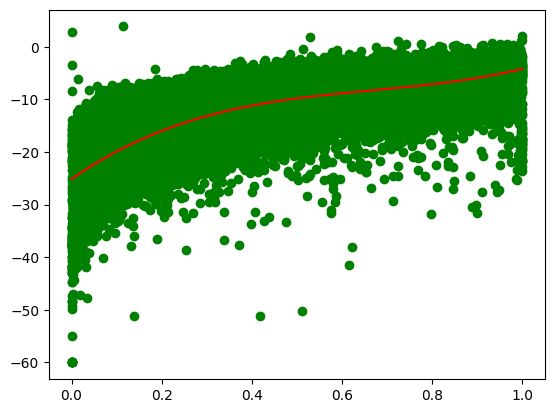

Score = 0.6873678751268928
Ridge with degree = 6


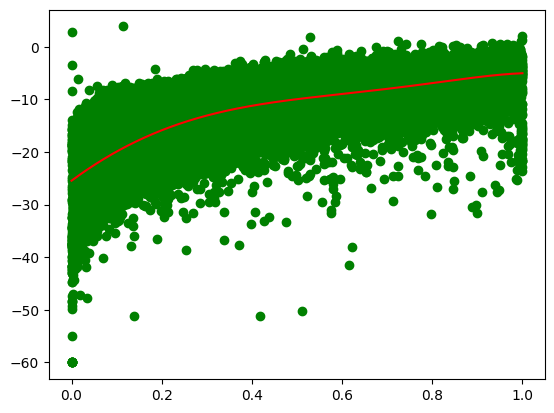

Score = 0.6873791344678727
Ridge with degree = 9


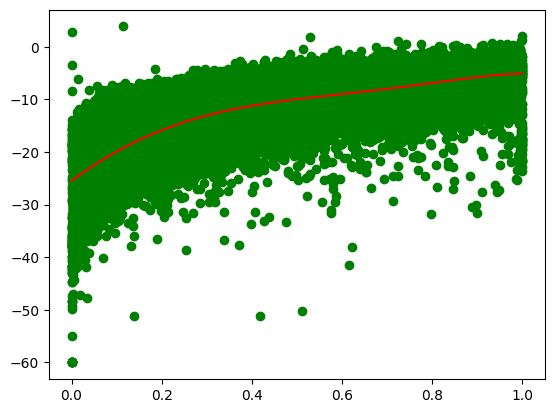

Score = 0.687692814540994
Ridge with degree = 12


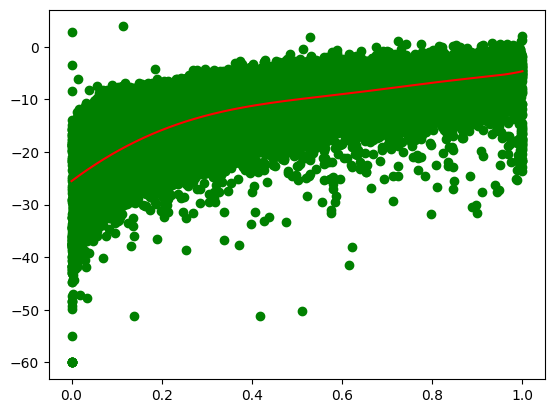

Score = 0.6876439153004057
Ridge with degree = 15


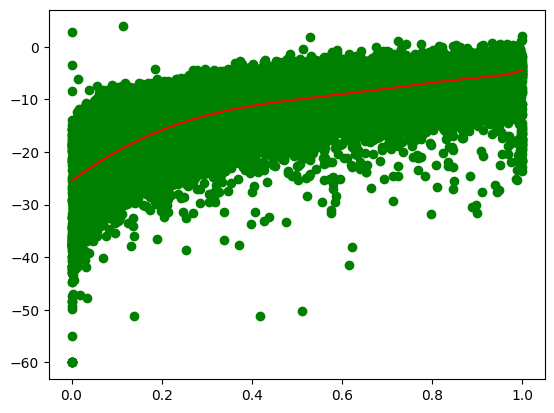

Score = 0.687725764215471
Ridge with degree = 18


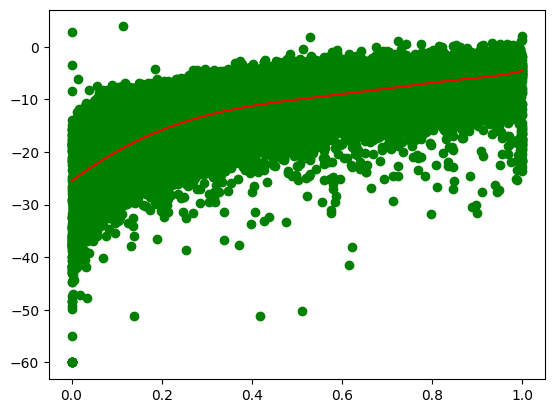

Score = 0.6878416686026382
Ridge with degree = 20


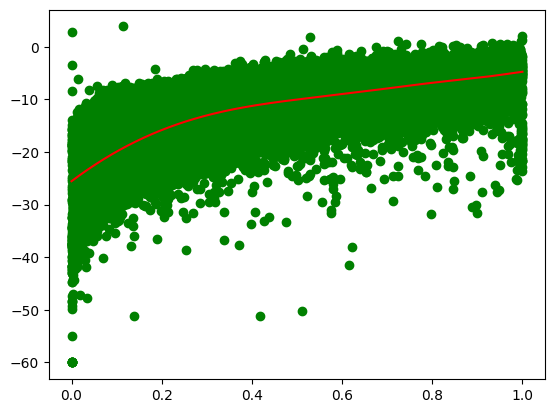

Score = 0.6881148611618053
Ridge with degree = 30


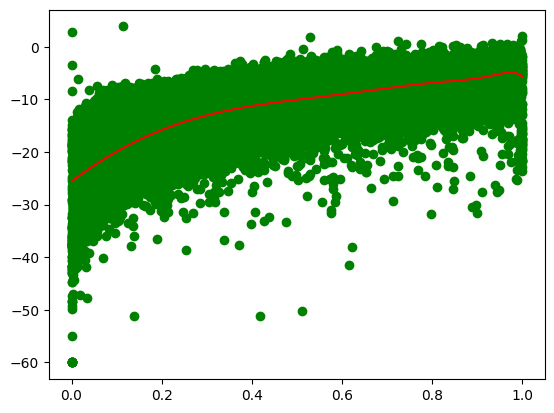

In [42]:
for deg in [1,2,3,6,9,12,15,18,20,30]:
    energy_deg = PolynomialFeatures(degree=deg).fit_transform(energy)[:,1:]
    model = Ridge()
    model.fit(energy_deg, loudness)
    
    # train the regressor on training set
    pred = model.predict(energy_deg)
    
    print(f"Score = {model.score(energy_deg, loudness)}")
    
    # For a nice plot
    stack = np.hstack((energy, pred))
    sorted_s = stack[np.argsort(stack[:,0])]
    energy2, pred = np.hsplit(sorted_s, 2)
    
    # plot
    print(f"Ridge with degree = {deg}")
    plt.scatter(df_train["energy"], df_train["loudness"], c="g")
    plt.plot(energy2, pred, c="r")
    plt.show()

The highest is the degree of the polynom, the better is the score. But we reach a limit of score on degree 12 where, whenever the increase of the degree, the score remains stable. The max score is 68%

#### Testing step

In [44]:
energy2 = np.array(df_test["energy"]).reshape(-1,1)
loudness2 = np.asarray(df_test["loudness"]).reshape(-1,1)
energy_deg = PolynomialFeatures(degree=30).fit_transform(energy2)[:,1:]
    
# train the regressor on training set
pred = model.predict(energy_deg)

print(f"Score on test data = {model.score(energy_deg, loudness2)}")

Score = 0.6857588178544347


### Lasso multiple linear regression

#### Training step

In [4]:
# training step
energy = np.array(df_train["energy"]).reshape(-1,1)
loudness = np.array(df_train["loudness"]).reshape(-1,1)
for deg in [1,2,3,6,9]:
    energy_deg = PolynomialFeatures(degree=deg).fit_transform(energy)[:,1:]
    model = Lasso()
    model.fit(energy_deg, loudness)
    
    # train the regressor on training set
    pred = model.predict(energy_deg)
    
    print(f"Score = {model.score(energy_deg, loudness)}")
    
    # plot
    print(f"Lasso with degree = {deg}")
    plt.scatter(df_train["energy"], df_train["loudness"], c="g")
    plt.plot(energy_deg, pred, c="r")
    plt.show()

NameError: name 'np' is not defined

# To do : 
- predict the year
- regression of loudness with energy + acousticness 
Goal of the regressions of loudness : which model help predict the best the loudness
Goal of the regressions of popularity : which parameters should the artists take into consideration to hope their music to be popular

Second step : get the most popular artists per year
- Take popular artists per year 
- analyze their data to see if from year to another, popularity criteria changed